# Installation

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import numpy as np
import os

plt.rcParams['text.usetex'] = False
plt.rcParams["font.family"] = "serif"

# **Read Data**

In [2]:
# Read a text file and transform it into a pandas dataframe
def read_txt_to_dataframe(file_path):
    try:
        # Read the contents of the file
        with open(file_path, 'r') as file:
            data = file.read()

        # Remove "<" and ">" symbols using string replace
        data = data.replace('<', '').replace('>', '')

        # Use StringIO to read the modified data into a DataFrame without changing the original file
        modified_file = StringIO(data)

        # Read the CSV data into a DataFrame
        df = pd.read_csv(modified_file)
        return df
    
    except FileNotFoundError:
        print(f"Error: File '{file_path}' not found.")
        return None

# Convert some columns into datetime objects
def convert_to_time_series(df):
    # Convert the 'DTYYYYMMDD' column to a datetime object
    df['DTYYYYMMDD'] = pd.to_datetime(df['DTYYYYMMDD'], format='%Y%m%d')
    
    # Create a weekly time lag column
    df['WEEK'] = df['DTYYYYMMDD'].dt.isocalendar().week
    
    # Convert the 'TIME' column to a datetime object
    df['TIME'] = pd.to_datetime(df['TIME'].astype(str).str.zfill(6), format='%H%M%S').dt.time

    # Combining the 'DTYYYYMMDD' and 'TIME' columns into a single 'DATE' column
    df['DATE'] = pd.to_datetime(df['DTYYYYMMDD'].astype(str) + ' ' + df['TIME'].astype(str))

    # Drop the 'DTYYYYMMDD' and 'TIME' columns
    df.drop(columns=['DTYYYYMMDD', 'TIME'], inplace=True)

    return df

In [3]:
# Initialize empty dataframes
bp_dia_df = pd.DataFrame()
bp_min_df = pd.DataFrame()

# Loop through the files in the "Data" folder
for file_name in ["bp1dia.txt", "bp1min.txt"]:
  file_path = os.path.join('datos', file_name)
  
  # Check if the file name ends with "dia.txt"
  if file_name.endswith('dia.txt'):
    temp_df = read_txt_to_dataframe(file_path)
    temp_df = convert_to_time_series(temp_df)
    bp_dia_df = pd.concat([bp_dia_df, temp_df], ignore_index=True)
  
  # Check if the file name ends with "min.txt"
  elif file_name.endswith('min.txt'):
    temp_df = read_txt_to_dataframe(file_path)
    temp_df = convert_to_time_series(temp_df)
    bp_min_df = pd.concat([bp_min_df, temp_df], ignore_index=True)

bp_dia_df.drop(['TICKER', 'PER', 'OPENINT', 'WEEK'], axis=1, inplace=True)
bp_min_df.drop(['TICKER', 'PER', 'OPENINT', 'WEEK'], axis=1, inplace=True)

# **Data description**

In [4]:
# Summary statistics
display(bp_dia_df.describe())
display(bp_min_df.describe())

,OPEN,HIGH,LOW,CLOSE,VOL,DATE
count,12292.000000,12292.000000,12292.000000,12292.000000,12292.000000,12292
mean,1.627177,1.633265,1.621159,1.627438,40743.507159,1999-06-10 22:34:42.915717632
min,1.035000,1.061500,1.034500,1.050000,0.000000,1975-02-13 00:00:00
25%,1.460950,1.467800,1.455175,1.461400,5670.000000,1987-04-21 18:00:00
50%,1.599000,1.604800,1.593200,1.599050,12379.000000,1999-06-21 12:00:00
75%,1.770000,1.776000,1.763025,1.770000,79144.250000,2011-07-20 06:00:00
max,2.445000,2.448500,2.440000,2.445500,504320.000000,2023-09-20 00:00:00
std,0.253982,0.254132,0.253805,0.254020,48442.249046,NaN


,OPEN,HIGH,LOW,CLOSE,VOL,DATE
count,4.194013e+06,4.194013e+06,4.194013e+06,4.194013e+06,4.194013e+06,4194013
mean,1.413919e+00,1.414024e+00,1.413815e+00,1.413919e+00,7.493318e+01,2017-04-15 06:47:42.412200704
min,1.041400e+00,1.041400e+00,1.039200e+00,1.039200e+00,0.000000e+00,2010-09-20 07:03:00
25%,1.288100e+00,1.288200e+00,1.288000e+00,1.288100e+00,1.100000e+01,2013-12-17 07:13:00
50%,1.375000e+00,1.375100e+00,1.374900e+00,1.375000e+00,3.500000e+01,2017-05-15 01:43:00
75%,1.564300e+00,1.564400e+00,1.564200e+00,1.564300e+00,8.700000e+01,2020-07-28 20:44:00
max,1.717900e+00,1.718400e+00,1.717500e+00,1.718000e+00,1.848500e+04,2023-09-20 11:53:00
std,1.517201e-01,1.517188e-01,1.517216e-01,1.517201e-01,1.475293e+02,NaN


In [5]:
# Display the head of the datasets
display(bp_dia_df.head())
display(bp_min_df.head())

,OPEN,HIGH,LOW,CLOSE,VOL,DATE
0,2.3120,2.3120,2.3120,2.3120,1,1975-02-13
1,2.3125,2.3155,2.3125,2.3125,4,1975-02-14
2,2.3125,2.3125,2.3120,2.3125,0,1975-02-18
3,2.3120,2.3170,2.3120,2.3140,2,1975-02-19
4,2.3160,2.3220,2.3160,2.3220,2,1975-02-20


,OPEN,HIGH,LOW,CLOSE,VOL,DATE
0,1.5662,1.5663,1.5662,1.5663,2,2010-09-20 07:03:00
1,1.5662,1.5662,1.5662,1.5662,1,2010-09-20 07:04:00
2,1.5661,1.5661,1.5661,1.5661,13,2010-09-20 07:05:00
3,1.5663,1.5663,1.5661,1.5662,18,2010-09-20 07:06:00
4,1.5662,1.5662,1.5662,1.5662,2,2010-09-20 07:07:00


# **EXploratory Data Analysis**

## Daily data through the years

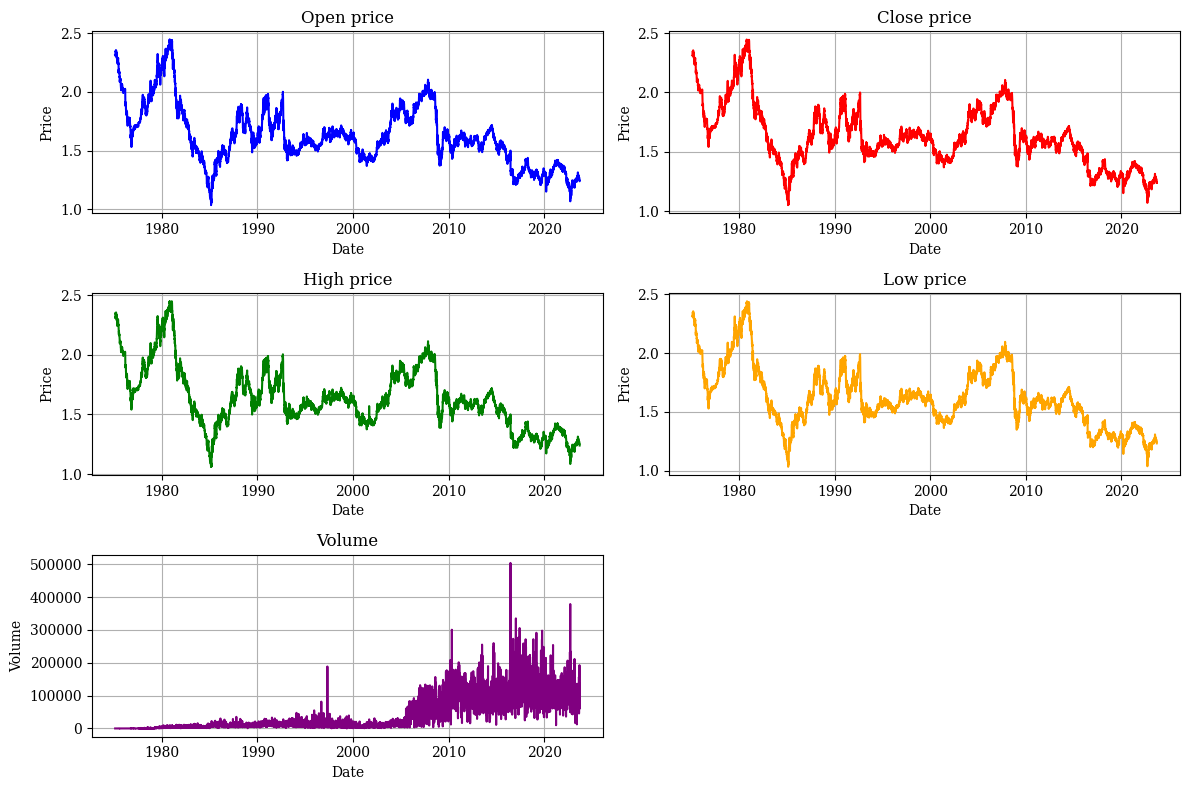

In [6]:
# Plot the data, x=DATE, y=OPEN or CLOSE or HIGH or LOW or VOL
fig, axs = plt.subplots(3, 2, figsize=(12, 8))

# Plot the data
sns.lineplot(x='DATE', y='OPEN', data=bp_dia_df, ax=axs[0, 0], color='blue')
axs[0, 0].set_title('Open price')
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('Price')
axs[0, 0].grid()

sns.lineplot(x='DATE', y='CLOSE', data=bp_dia_df, ax=axs[0, 1], color='red')
axs[0, 1].set_title('Close price')
axs[0, 1].set_xlabel('Date')
axs[0, 1].set_ylabel('Price')
axs[0, 1].grid()

sns.lineplot(x='DATE', y='HIGH', data=bp_dia_df, ax=axs[1, 0], color='green')  
axs[1, 0].set_title('High price')
axs[1, 0].set_xlabel('Date')
axs[1, 0].set_ylabel('Price')
axs[1, 0].grid()

sns.lineplot(x='DATE', y='LOW', data=bp_dia_df, ax=axs[1, 1], color='orange')
axs[1, 1].set_title('Low price')
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('Price')
axs[1, 1].grid()

sns.lineplot(x='DATE', y='VOL', data=bp_dia_df, ax=axs[2, 0], color='purple')
axs[2, 0].set_title('Volume')
axs[2, 0].set_xlabel('Date')
axs[2, 0].set_ylabel('Volume')
axs[2, 0].grid()

# Remove the last subplot
fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.savefig('daily_prices.png')
plt.show()

## Correlation matrix

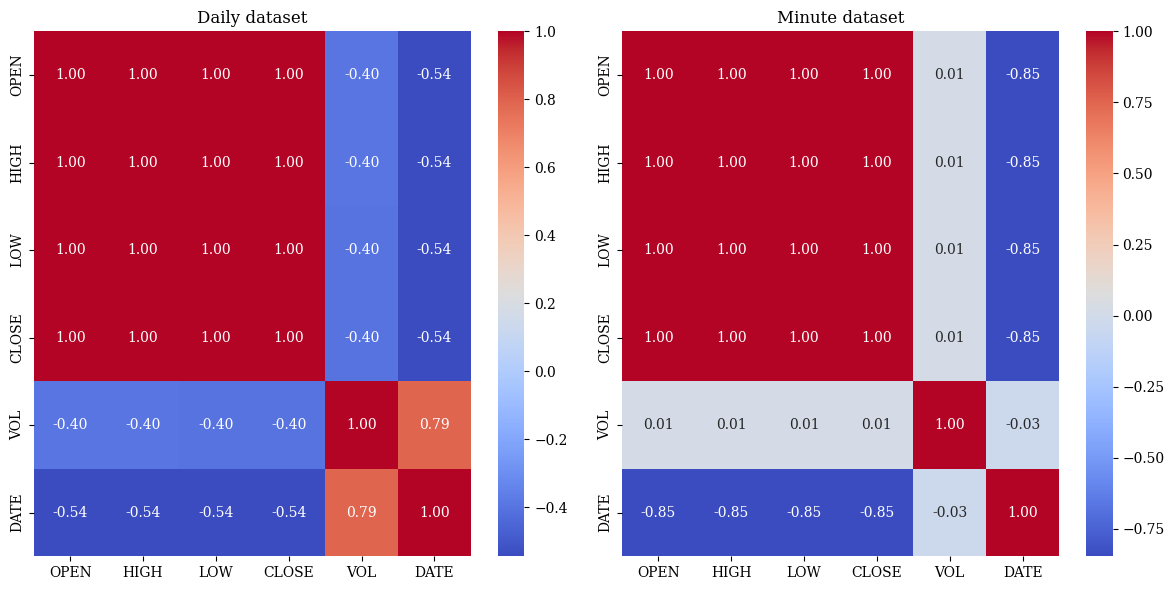

In [7]:
# Plot the correlation matrices of the datasets
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the correlation matrix of the daily dataset
sns.heatmap(bp_dia_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axs[0])
axs[0].set_title('Daily dataset')

# Plot the correlation matrix of the minute dataset
sns.heatmap(bp_min_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=axs[1])
axs[1].set_title('Minute dataset')

plt.tight_layout()
plt.show()

## Average behavior of the close price and volume through the day

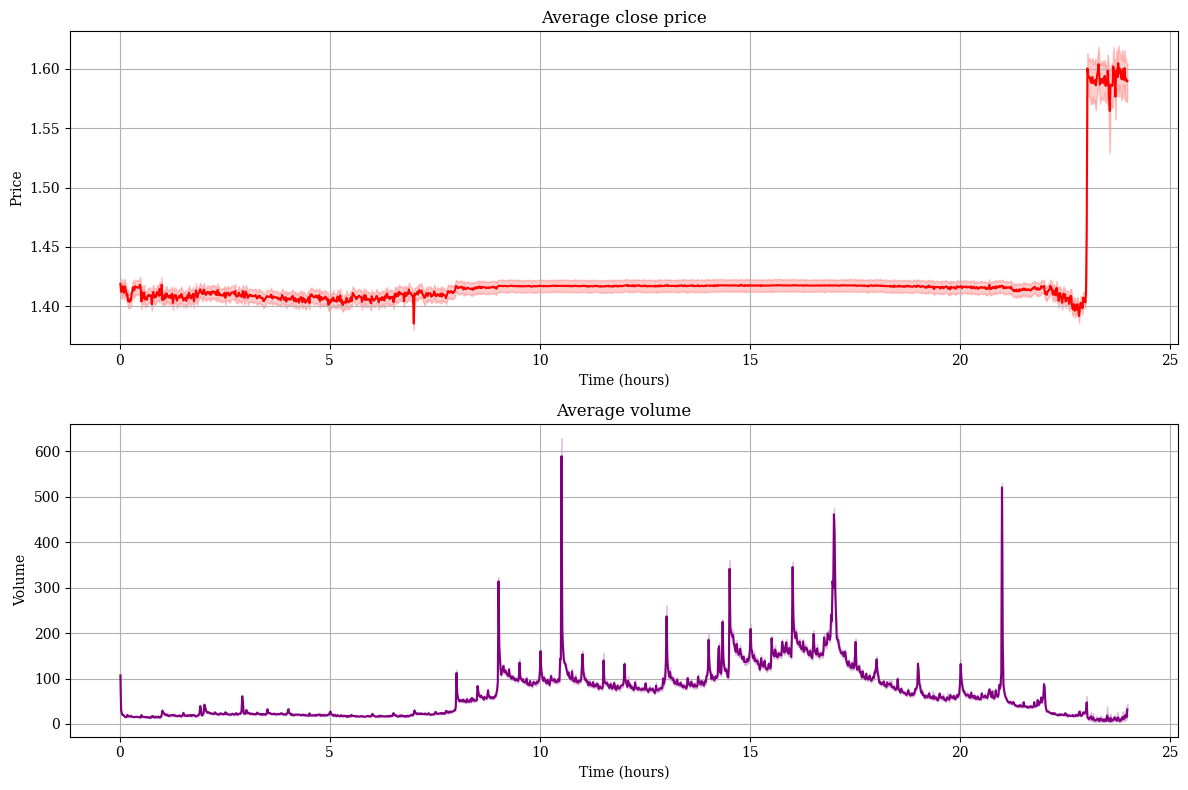

In [15]:
# Plot the average CLOSE price and volume, y=CLOSE or VOL, x = time in hours
fig, axs = plt.subplots(2, 1, figsize=(12, 8))

# Plot the average CLOSE price
bp_min_df['HOUR'] = bp_min_df['DATE'].dt.hour
bp_min_df['MINUTE'] = bp_min_df['DATE'].dt.minute
bp_min_df['TIME'] = bp_min_df['HOUR'] + bp_min_df['MINUTE'] / 60
bp_min_df.drop(['HOUR', 'MINUTE'], axis=1, inplace=True)

sns.lineplot(x='TIME', y='CLOSE', data=bp_min_df, ax=axs[0], color='red')
axs[0].set_title('Average close price')
axs[0].set_xlabel('Time (hours)')
axs[0].set_ylabel('Price')
axs[0].grid()

# Plot the average volume
sns.lineplot(x='TIME', y='VOL', data=bp_min_df, ax=axs[1], color='purple')
axs[1].set_title('Average volume')
axs[1].set_xlabel('Time (hours)')
axs[1].set_ylabel('Volume')
axs[1].grid()

plt.tight_layout()
plt.show()

## Boxplot of close and volume per month

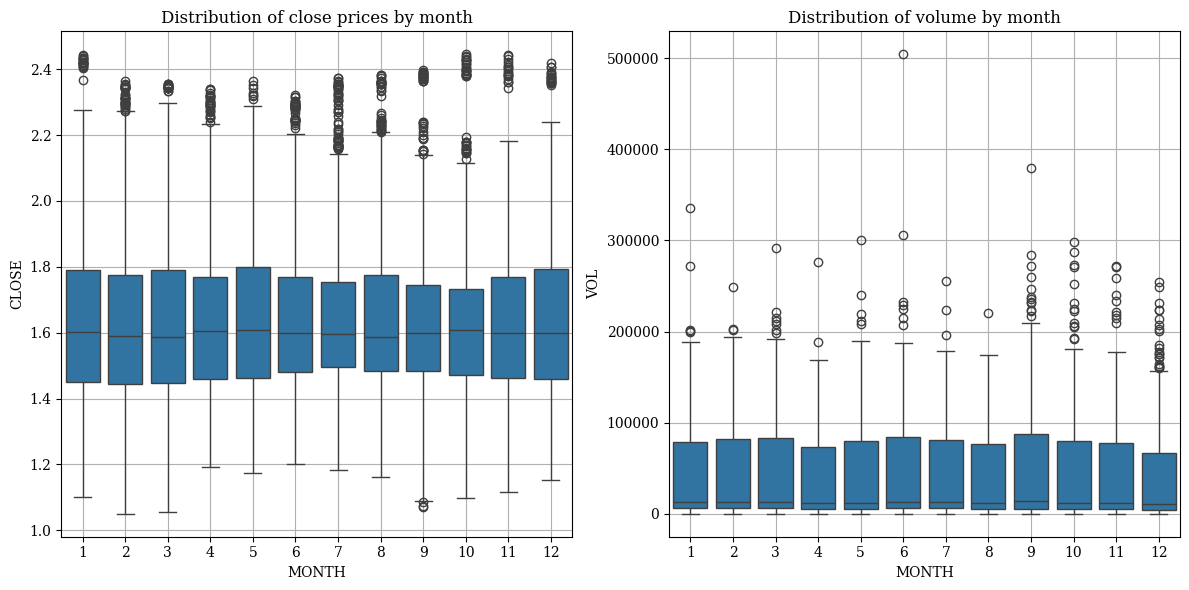

In [9]:
# Create a new column for the month
bp_dia_df['MONTH'] = bp_dia_df['DATE'].dt.month

# Create a boxplot for each price type
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(x='MONTH', y='CLOSE', data=bp_dia_df, ax=axs[0])
axs[0].set_title('Distribution of close prices by month')
axs[0].grid()

sns.boxplot(x='MONTH', y='VOL', data=bp_dia_df, ax=axs[1])
axs[1].set_title('Distribution of volume by month')
axs[1].grid()

plt.tight_layout()
plt.show()

## Rolling mean and standard deviation of close prices and volume

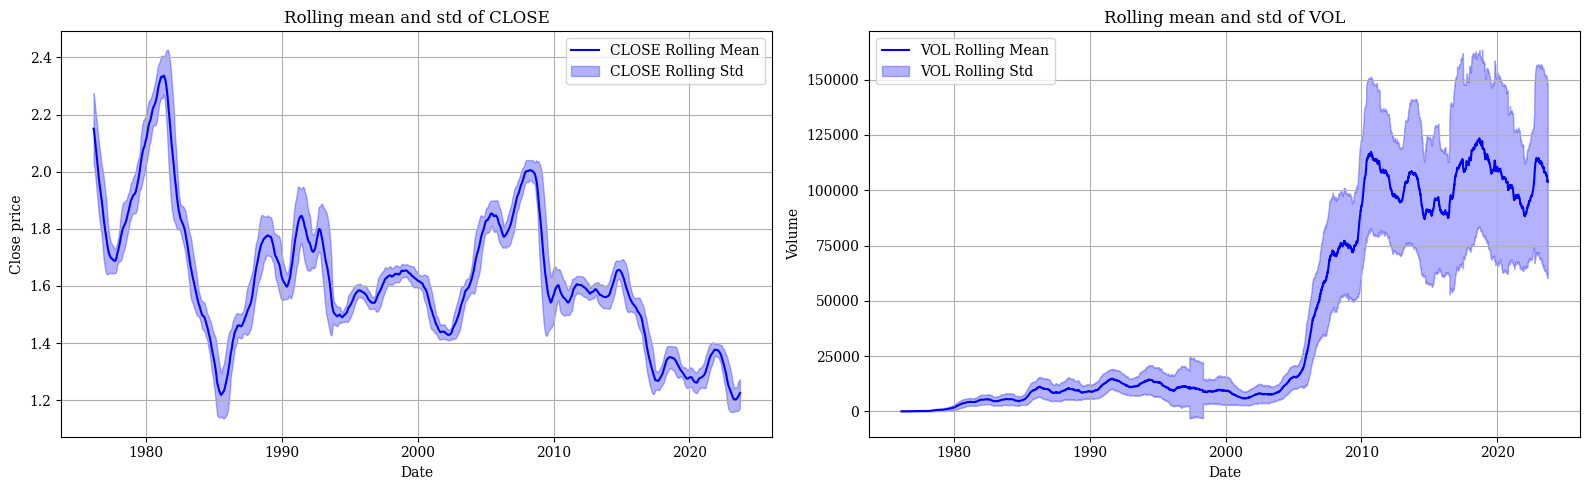

In [10]:
# Calculate the rolling mean and standard deviation of the close prices and volumes
bp_dia_df['CLOSE_MEAN'] = bp_dia_df['CLOSE'].rolling(window=252).mean()
bp_dia_df['CLOSE_STD'] = bp_dia_df['CLOSE'].rolling(window=252).std()
bp_dia_df['VOL_MEAN'] = bp_dia_df['VOL'].rolling(window=252).mean()
bp_dia_df['VOL_STD'] = bp_dia_df['VOL'].rolling(window=252).std()

fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot for Close prices
sns.lineplot(x='DATE', y='CLOSE_MEAN', data=bp_dia_df, ax=axs[0], label='CLOSE Rolling Mean', color='blue')
axs[0].fill_between(bp_dia_df['DATE'], 
                    bp_dia_df['CLOSE_MEAN'] - bp_dia_df['CLOSE_STD'], 
                    bp_dia_df['CLOSE_MEAN'] + bp_dia_df['CLOSE_STD'], 
                    color='blue', alpha=0.3, label='CLOSE Rolling Std')
axs[0].set_title('Rolling mean and std of CLOSE')
axs[0].set_xlabel('Date')
axs[0].set_ylabel('Close price')
axs[0].legend()
axs[0].grid()

# Plot for Volumes
sns.lineplot(x='DATE', y='VOL_MEAN', data=bp_dia_df, ax=axs[1], label='VOL Rolling Mean', color='blue')
axs[1].fill_between(bp_dia_df['DATE'], 
                    bp_dia_df['VOL_MEAN'] - bp_dia_df['VOL_STD'], 
                    bp_dia_df['VOL_MEAN'] + bp_dia_df['VOL_STD'], 
                    color='blue', alpha=0.3, label='VOL Rolling Std')
axs[1].set_title('Rolling mean and std of VOL')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Volume')
axs[1].legend()
axs[1].grid()

plt.tight_layout()
plt.show()

## Histogram of close prices

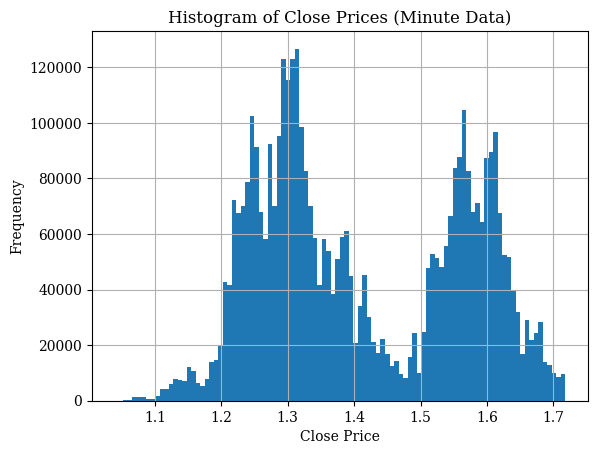

In [11]:
# histogram of close prices for the minute data
plt.hist(bp_min_df['CLOSE'], bins=100)
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.title('Histogram of Close Prices (Minute Data)')
plt.grid()
plt.show()


## Mean volume per month

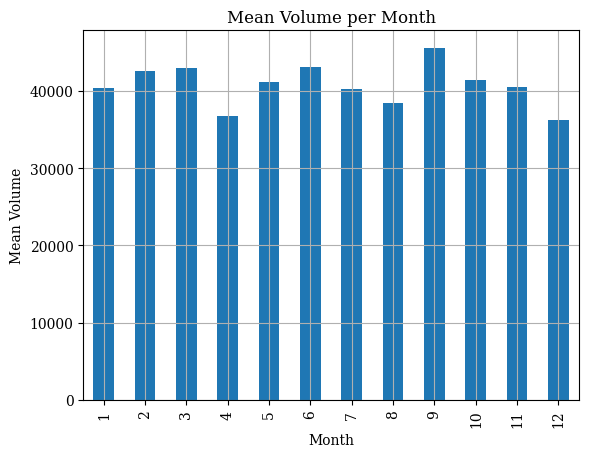

In [12]:
# Mean volume per month
mean_volume = bp_dia_df.groupby('MONTH')['VOL'].mean()
mean_volume.plot(kind='bar')
plt.title('Mean Volume per Month')
plt.xlabel('Month')
plt.ylabel('Mean Volume')
plt.grid()
plt.show()